# Powerline effect in Butte and Glenn Counties, CA

Figures 13, 14, 19 of the Kang et al. (2020) are generated using this notebook. 
To run the simulation, you need to run `skytem-butte-powerline.py` in `python_scripts` folder. 

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
data_ref = np.load("./skytem_butte_powerline/data-ref.npy")
data_powerline = np.load("./skytem_butte_powerline/data.npy")
xyz = np.load("./skytem_butte_powerline/xyz.npy")

In [37]:
data_hm_powerline = data_powerline[:100*30].reshape((30, 100), order='F').T
data_lm_powerline = data_powerline[100*30:].reshape((20, 100), order='F').T  
data_hm_ref = data_ref[:100*30].reshape((30, 100), order='F').T
data_lm_ref = data_ref[100*30:].reshape((20, 100), order='F').T  

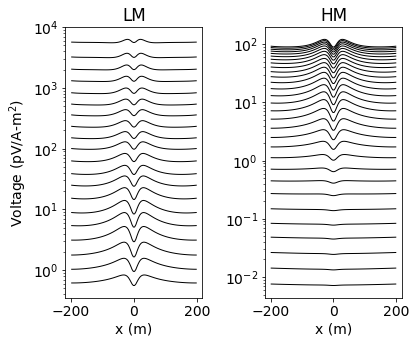

In [38]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.size'] = 14
moment = np.pi*(13.25**2) * 1e-12

fig, axs = plt.subplots(1, 2, figsize = (6,5))

out = axs[0].semilogy(xyz[:,0], -data_lm_powerline[:,:]/moment, 'k-', lw=1)
out = axs[1].semilogy(xyz[:,0], -data_hm_powerline[:,:]/moment, 'k-', lw=1)

for ax in axs:
    ax.set_xlabel('x (m)')
axs[0].set_ylabel("Voltage (pV/A-m$^2$)")
axs[0].set_title("LM")
axs[1].set_title("HM")
plt.tight_layout()
fig.savefig('./figures/figure-13', dpi=200)

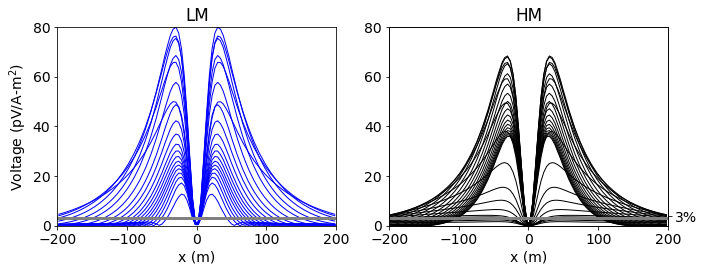

In [39]:
ppe_hm = ( abs((data_hm_powerline-data_hm_ref) / data_hm_ref) ) * 100
ppe_lm = ( abs((data_lm_powerline-data_lm_ref) / data_lm_ref) ) * 100

fig, axs = plt.subplots(1, 2, figsize = (10,4))

out = axs[0].plot(xyz[:,0], ppe_lm[:,:], 'b-', lw=1)
out = axs[1].plot(xyz[:,0], ppe_hm[:,:], 'k-', lw=1)
for ax in axs:
    ax.set_xlabel('x (m)')
#     ax.set_ylim(0, 100)
    ax.set_xlim(-200, 200)
    ax.plot((-200, 200), (3, 3), '-', color='grey', lw=3)
    ax.set_ylim(0, 80)
axs[0].set_ylabel("Voltage (pV/A-m$^2$)")
axs[0].set_title("LM")
axs[1].set_title("HM")
ax_1 = ax.twinx()
ax_1.set_ylim(0, 60)
ax_1.set_yticks([3.])
ax_1.set_yticklabels(['3%'])
plt.tight_layout()
# fig.savefig('../figures/figure-11', dpi=200)

In [40]:
data_tmp_powerline = np.c_[data_hm_powerline, data_lm_powerline]
data_tmp_ref = np.c_[data_hm_ref, data_lm_ref]

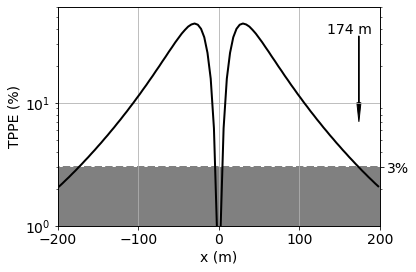

In [41]:
tpe_hm = np.sqrt((( abs((data_hm_powerline-data_hm_ref) / data_hm_ref) )**2).sum(axis=1) / 30.) * 100
tpe_lm = np.sqrt((( abs((data_lm_powerline-data_lm_ref) / data_lm_ref) )**2).sum(axis=1) / 20.) * 100
tpe = np.sqrt((( abs((data_tmp_powerline-data_tmp_ref) / data_tmp_ref) )**2).sum(axis=1) / 50.) * 100

inds_hm = np.logical_and(tpe_hm < 3., xyz[:,0]>10.)
inds_lm = np.logical_and(tpe_lm < 3., xyz[:,0]>10.)
inds = np.logical_and(tpe < 3., xyz[:,0]>10.)

fig, ax = plt.subplots(1,1,figsize=(6,4))
ax.semilogy(xyz[:,0], tpe, 'k', lw=2)
ax.fill_between([-210, 210], [3, 3], color='grey', linestyle='--', lw=2)
ax.set_ylim(1e0, 60)
ax.set_xlim(-200, 200)
ax.set_ylabel("TPPE (%)")
ax.grid(True)
ax.set_xlabel("x (m)")
ax_1 = ax.twinx()
ax_1.set_yscale('log')
ax_1.set_ylim(1, 60)
ax_1.set_yticks([3.])
ax_1.set_yticklabels(['3%'])
ax.arrow(174, 35, 0, -25, head_width=5, head_length=3, fc='k', ec='k')
ax.text(174-40, 36, '174 m')
plt.tight_layout()
# fig.savefig('./figures/figure-12', dpi=200)

C:\Users\sgkan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


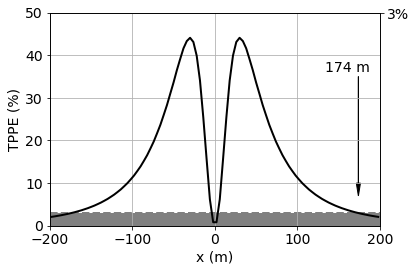

In [42]:
tpe_hm = np.sqrt((( abs((data_hm_powerline-data_hm_ref) / data_hm_ref) )**2).sum(axis=1) / 30.) * 100
tpe_lm = np.sqrt((( abs((data_lm_powerline-data_lm_ref) / data_lm_ref) )**2).sum(axis=1) / 20.) * 100
tpe = np.sqrt((( abs((data_tmp_powerline-data_tmp_ref) / data_tmp_ref) )**2).sum(axis=1) / 50.) * 100

inds_hm = np.logical_and(tpe_hm < 3., xyz[:,0]>10.)
inds_lm = np.logical_and(tpe_lm < 3., xyz[:,0]>10.)
inds = np.logical_and(tpe < 3., xyz[:,0]>10.)

fig, ax = plt.subplots(1,1,figsize=(6,4))
ax.plot(xyz[:,0], tpe, 'k', lw=2)
ax.fill_between([-210, 210], [3, 3], color='grey', linestyle='--', lw=2)
ax.set_ylim(0, 50)
ax.set_xlim(-200, 200)
ax.set_ylabel("TPPE (%)")
ax.grid(True)
ax.set_xlabel("x (m)")
ax_1 = ax.twinx()
ax_1.set_yscale('log')
ax_1.set_ylim(0, 50)
ax_1.set_yticks([3.])
ax_1.set_yticklabels(['3%'])
ax.arrow(174, 35, 0, -25, head_width=5, head_length=3, fc='k', ec='k')
ax.text(174-40, 36, '174 m')
plt.tight_layout()
fig.savefig('./figures/figure-14', dpi=200)

In [43]:
from SimPEG import Utils

In [44]:
TPE = np.tile(tpe, (100, 1))

In [45]:
TPE_cross = (TPE+TPE.T)*0.5
X, Y = np.meshgrid(xyz[:,0], xyz[:,0])
inds = np.logical_and(X>-40, X<40) | np.logical_and(Y>-40, Y<40)
TPE_cross[inds] = np.nan

In [46]:
from scipy.interpolate import NearestNDInterpolator

In [47]:
inds_act = ~np.isnan(TPE_cross.flatten())

In [48]:
f_int = NearestNDInterpolator(np.c_[X.flatten(), Y.flatten()][inds_act], TPE_cross.flatten()[inds_act])

In [49]:
TPE_cross_fill = f_int(np.c_[X.flatten(), Y.flatten()]).reshape(X.shape)

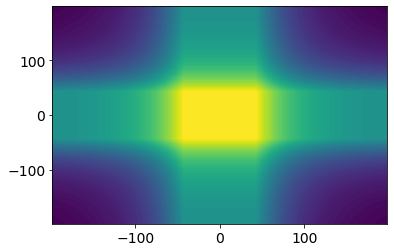

In [50]:
out=plt.contourf(xyz[:,0], xyz[:,0], TPE_cross_fill, 100)

C:\Users\sgkan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The following kwargs were not used by contour: 'clim'
  


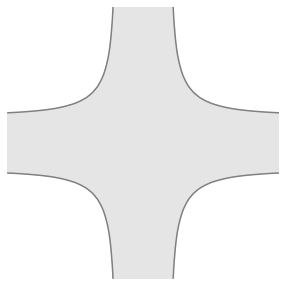

In [51]:
fig = plt.figure(figsize=(5,5))
out=plt.contourf(xyz[:,0], xyz[:,0], TPE_cross_fill, 100, cmap='binary', vmin=0, vmax=50, clim=(0, 50), alpha=0.1, levels=[20, 100])
plt.contour(xyz[:,0], xyz[:,0], TPE_cross_fill, levels=[20], colors='grey', linestyles='-')
plt.xticks([])
plt.yticks([])
# cb = plt.colorbar(out, ticks=[])

plt.gca().set_aspect(1)
plt.axis('off')
fig.savefig('./figures/zone', dpi=200)